In [ ]:
from google.colab import files
uploaded = files.upload()


Saving advertising.csv to advertising.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Display plots inline and set styles
%matplotlib inline
sns.set(style="whitegrid")


In [ ]:
df = pd.read_csv('advertising.csv')
df.head()  # Show first few rows


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
# Shape of the dataset(rows, columns)
print("Shape:", df.shape)

# Data types and null values(to spot missing data and datatype issue)
print("\nInfo:")
print(df.info())

# Summary statistics
print("\nDescription:")
print(df.describe())

# Unique values per column
print("\nUnique values:")
print(df.nunique())


Shape: (200, 4)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None

Description:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000

Unique values:
TV           190
Radio        167
Newspaper    172
Sales        121
dtyp

Missing Values:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


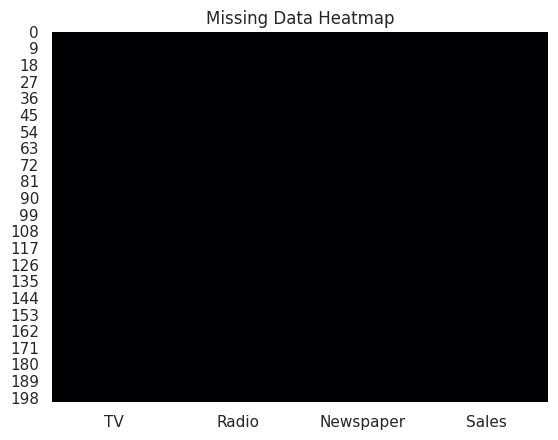

In [ ]:
# Missing values count
print("Missing Values:\n", df.isnull().sum())

# Visualize missing data
sns.heatmap(df.isnull(), cbar=False, cmap='magma')
plt.title("Missing Data Heatmap")
plt.show()


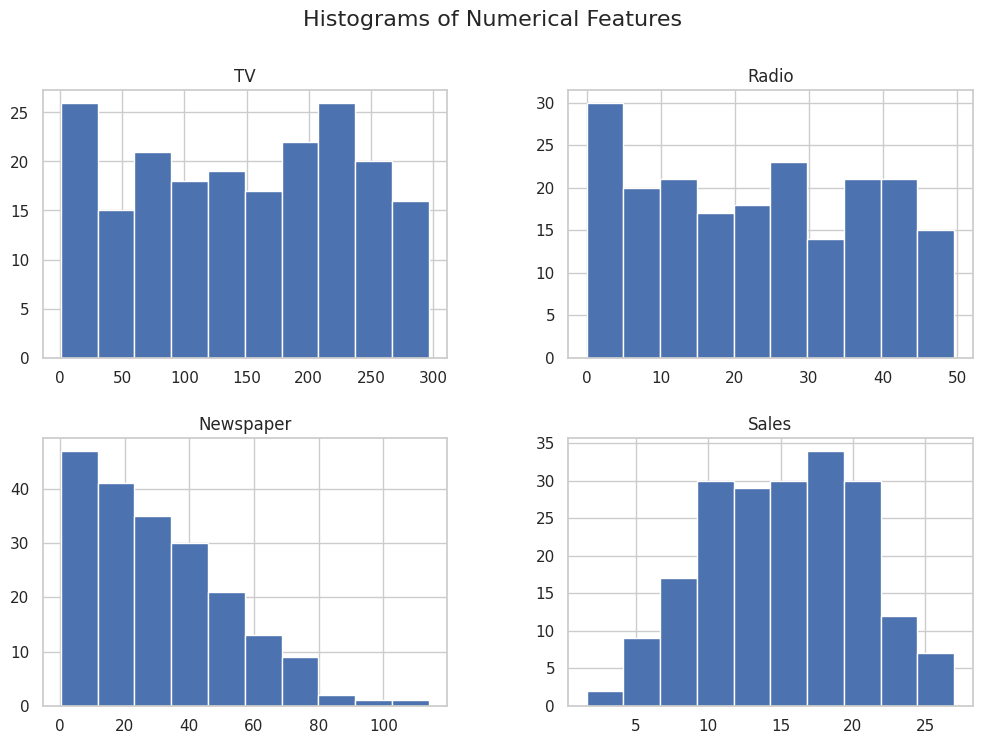

In [ ]:
# Histogram for each numerical column
df.hist(figsize=(12, 8))
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()


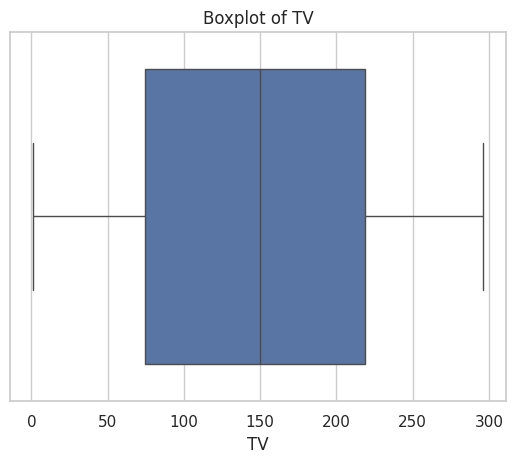

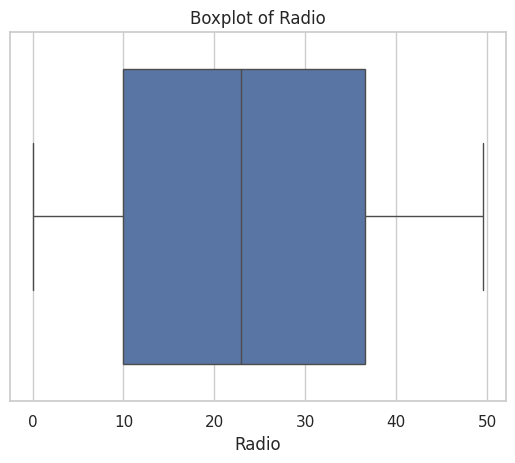

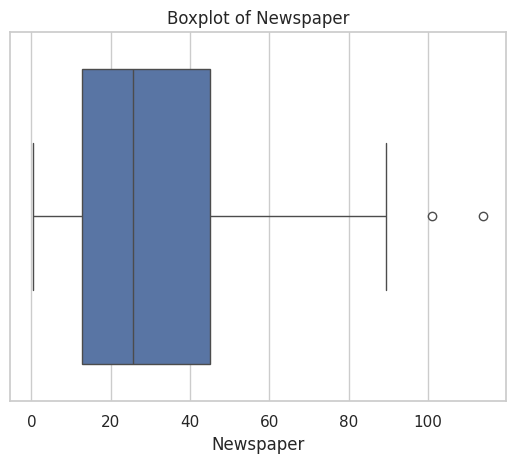

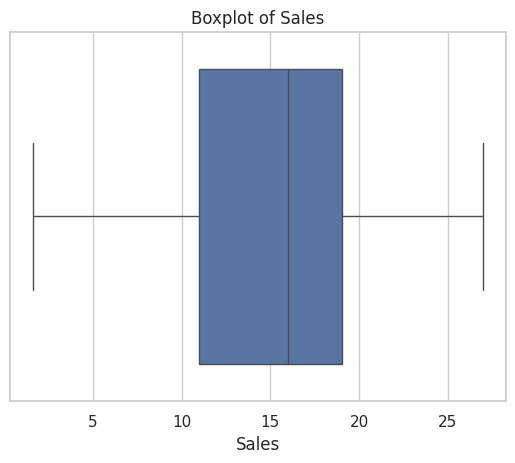

In [ ]:
for col in df.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


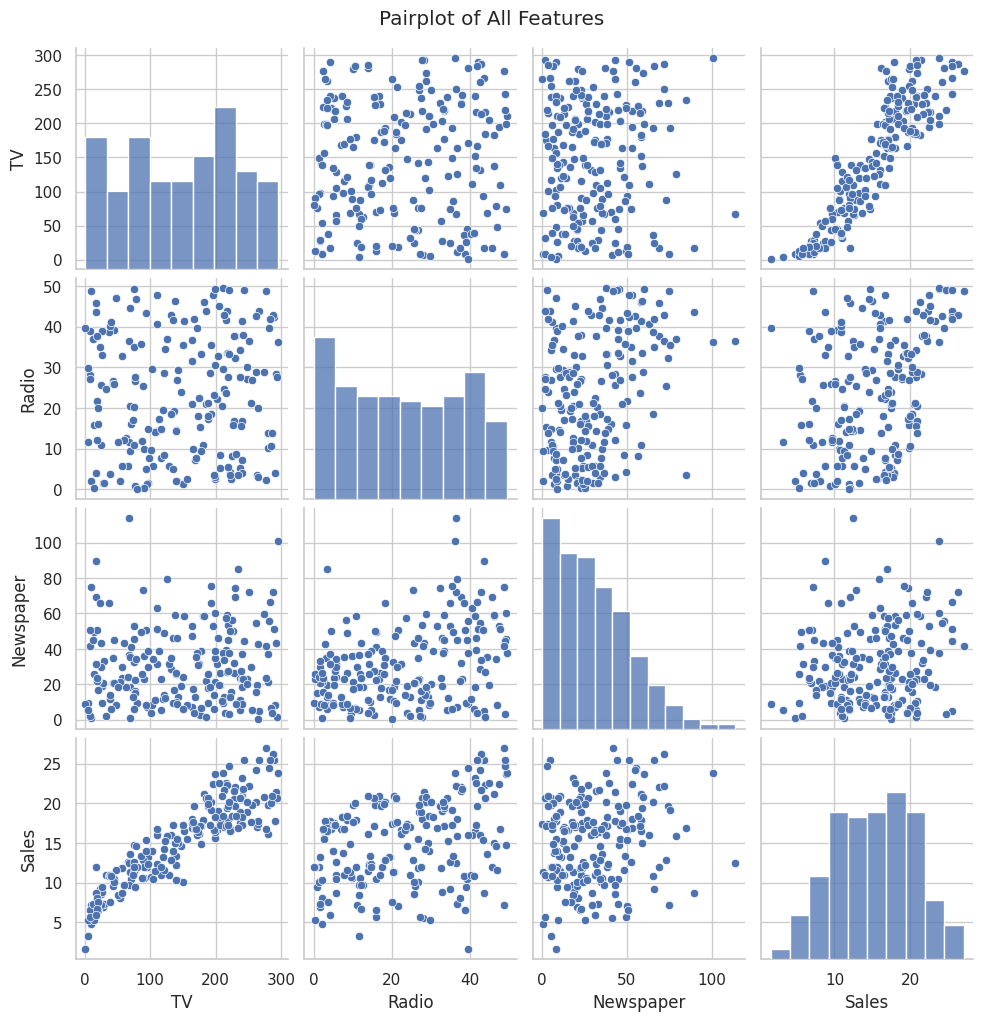

In [ ]:
sns.pairplot(df)
plt.suptitle("Pairplot of All Features", y=1.02)
plt.show()


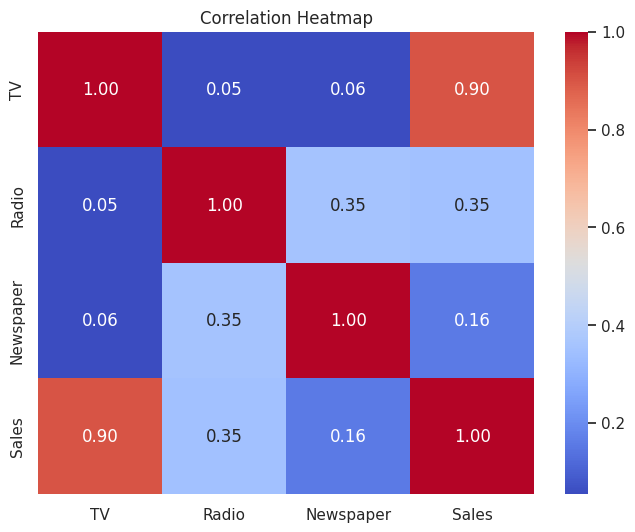

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


Skewness:
 TV          -0.069853
Radio        0.094175
Newspaper    0.894720
Sales       -0.073739
dtype: float64


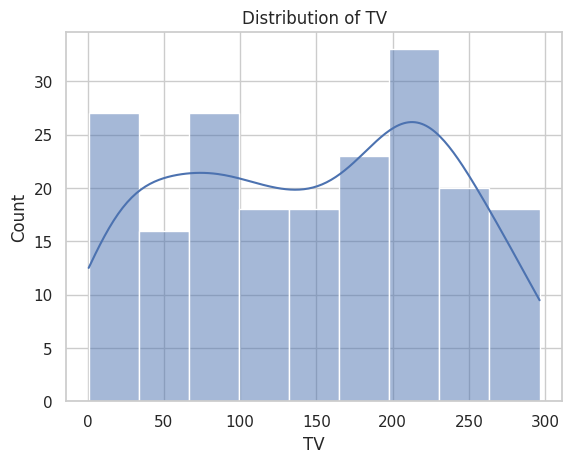

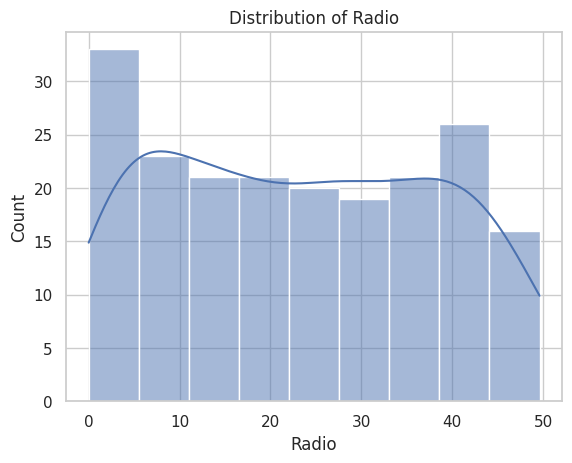

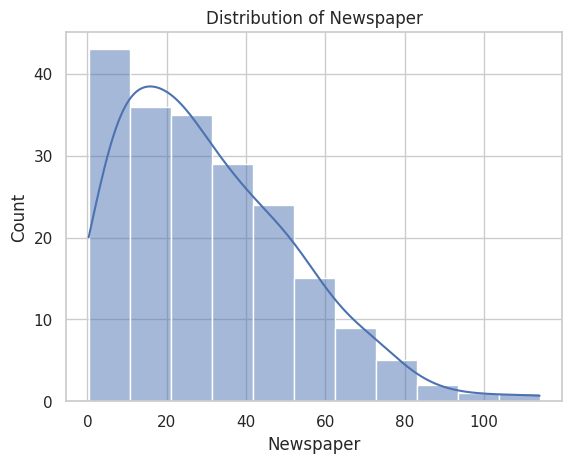

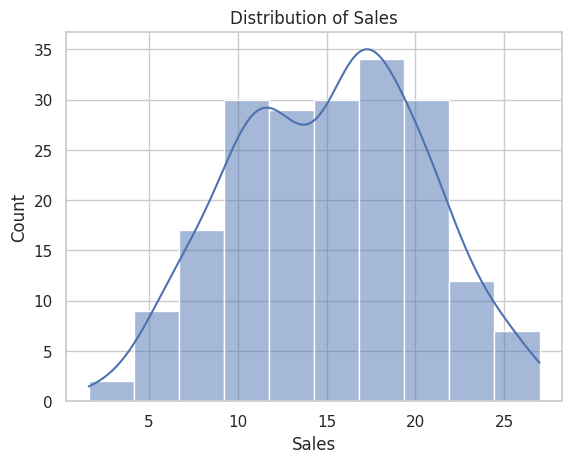

In [ ]:
print("Skewness:\n", df.skew(numeric_only=True))

# KDE Plots to visualize skew
for col in df.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("Outliers in each column:\n", outliers)


Outliers in each column:
 TV           0
Radio        0
Newspaper    2
Sales        0
dtype: int64


In [ ]:
# Save cleaned version if needed
df.to_csv("cleaned_advertising.csv", index=False)
